## Introduction

Scenario: What would be happier than eating good food? Except one thing that blocks you from doing that **Horapa** or **Thai Basil**.

In Thailand, favourite main dish of most people would be **Minched Pork Kaprao (Holy Basil) with fried egg** like this image:

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fs.isanook.com%2Fwo%2F0%2Fud%2F36%2F180929%2F3.jpg%3Fip%2Fresize%2Fw728%2Fq80%2Fjpg&f=1&nofb=1&ipt=3cc4b1dd92ce0d94b10a8d7cadf1296cdbfff0a45345a6dc9f782366957bc973&ipo=images)

However, it is quite hard for an excellent cook like you to eyeball and pick which one is **Kaprao** or **Horapa**. If you choose the wrong ingredient, this can cause negative effect to the taste of the delicious **Kaprao** and you do not want it to happen Right?

Therefore, the objective of this project is to let the machine help you classify which one is **Kaprao** that you want and ditch the ugly taste (in my opinion) **Horapa** out!

## Setup

First, we need to setup an access to *Google Drive*. This is to persist data or artifacts in a local drive even when we are not connected to *Google Colab*.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Then, install `fastai` and `duckduckgo-search` as necessary dependencies and import them.

In [2]:
!pip install -Uqq fastai duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 49.3 MB/s eta 0:00:00


Next, we need to download dataset. Here I use `git clone` to download a repo which contains our dataset to local runtime. After that, `unzip -d` to extract and move them to mounted *Google Drive*. Don't forget to `mkdir` before hand.

In [3]:
!git clone https://github.com/TAUTOLOGY-EDUCATION/DATASET.git

Cloning into 'DATASET'...
remote: Enumerating objects: 1301, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1301 (delta 4), reused 12 (delta 3), pack-reused 1285
Receiving objects: 100% (1301/1301), 1.96 GiB | 38.53 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Filtering content: 100% (3/3), 5.02 GiB | 55.93 MiB/s, done.


In [4]:
!mkdir -p "gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data"
!unzip /content/DATASET/HorapaVsKaprao/horapa-01.zip -d "gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data" && unzip /content/DATASET/HorapaVsKaprao/kaprao.zip -d "gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data"

Archive:  /content/DATASET/HorapaVsKaprao/horapa-01.zip
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233046.jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233042(0).jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233140.jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233148.jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233052.jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233149.jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233112.jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233055.jpg  
  inflating: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_233146.jpg  
  inf

In [5]:
!ls "gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data"

horapa	kapao


As you can see the `kapao` folder is mispelling. So, we have to change it to the correct one first before we do labelling process.

Note that as we will use folder names to label images, the order of the folders will be an index to each label. In this case, 0 - horapa and 1 - kaprao.

In [6]:
!mv "gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/kapao" "gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/kaprao"

## Data Preprocessing

Now that we have our photo of Thai basil and Holy basil, Let's see to get the sense of it.

In [53]:
from fastai.vision.all import Image, get_image_files, verify_images
from pathlib import Path

In [54]:
def remove_invalid_images(path, suffixes):
    """
    Remove invalid images from in dataset folder.
    """
    for suffix in suffixes:
        filename = path/suffix
        failed = verify_images(get_image_files(filename))
        print(f"In {filename}, There are {len(failed)} as unverified images: {failed}")

        if failed:
            print(f"Unlinking those files permanently...")
            failed.map(Path.unlink)

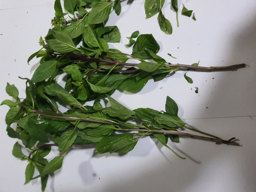

In [55]:
# Horapa
im = Image.open("gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa/20220425_221530.jpg")
im.to_thumb(256, 256)

Note that the `Image` object has a height x width shape.

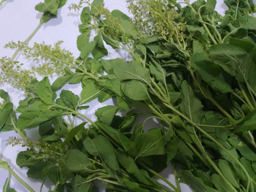

In [56]:
# Kaprao
im = Image.open("gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/kaprao/20220425_205023(0).jpg")
im.to_thumb(256, 256)

See! those two types of ingredient are quite similar. I myself can not distinguish between them.

Next, we will ensure the validity of our images before training.

In [57]:
path = Path("gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data")
suffixes = ["horapa", "kaprao"]
remove_invalid_images(path, suffixes)

In gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa, There are 0 as unverified images: []
In gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/kaprao, There are 0 as unverified images: []


Good! we can use all images we have downloaded for experimentation.

## Training (Fine-Tuning)

We will use various sizes of `resnet` to explore how it performing against our dataset.

### High-level APIs

`fastai` offer multiple levels of APIs. This is very useful when learning to use library to do deep learning. At first, it abstracts everything for you and let you configure less parameters. Throughout the course, this code will be develop to be used lower APIs.

In [59]:
from fastai.vision.all import Resize, resnet34, error_rate
from fastai.vision.data import ImageDataLoaders, parent_label
from fastai.vision.learner import vision_learner

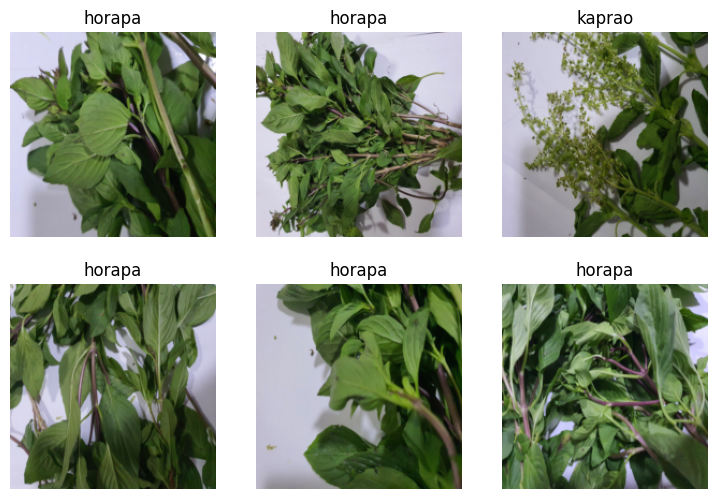

In [58]:
dls = ImageDataLoaders.from_folder(
    path=path,
    valid_pct=0.2,
    seed=42,
    item_tfms=[Resize(192, method="squish")] # squeeze image together as opposed to cropping
)

dls.show_batch(max_n=6)

In [60]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.665408,0.259226,0.081545,05:02


epoch,train_loss,valid_loss,error_rate,time
0,0.136087,0.102042,0.017167,04:48
1,0.080034,0.055630,0.017167,04:54
2,0.049438,0.054968,0.008584,04:45


In [62]:
# Save it for later use
!mkdir "gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/model"
learn.export("../model/horapa-vs-kaprao-resnet34.pkl")

From `error_rate`, we will see that it incorrectly classified less than 1%!

This model looks really good but does it? We need to introduce another set of data to ensure it.

Before going to the next section, I would like to note that despite the higher-level APIs, there are many configurations and hyperparameters that we can choose from:

* `from_folder` method in `ImageDataLoaders` object helps label data from the folder name.
* `valid_pct` is a proportion of validation data used to evaluate the model across epoch.
* `item_tfms` is the transformation on data in this case we set it to be `Resize(192, method="squish")`. Therefore, every images will be `192x192` via squeezing.

Next, we have configuration on the training process

* `resnet34` is the starting architecture that we will use
* `error_rate` is a metrics used to validate the model
* `epoch` is the number of epochs (a round trip of data to train the model). In this case, we train the model 3 round-trip of our data.
* `learning_rate` is the step size of how fast you want the model to learn a particular batch of data.

## Evaluation

Now, back to business, model performance is the first thing we care about when developing ML project. So, it is the best practice that we test out our model using unseen data called **Validation dataset**. As you probably know, you have already tested the model!

Remember the result table we saw when training, `valid_loss` is the model performance from held-out dataset splitted by `valid_pct`. If it decrease over epochs, we can ensure the model can generalize to some extent but we are not done.

In practice, we need to do an experiment several times by training the model with different hyperparameters or even dealing with data processing in order to tap the highest potential of the model. It is a trial-and-error process.

Therefore, at the end of the day, we might bias ourselves from the choices that you have made. As a result, it is a best practice to have another held-out dataset to **ensure** the model performance before going into production.

### Test Set

We will use `duckduckgo-search` to find a set of images online to be used as **test set**.

In [63]:
import time
from duckduckgo_search import DDGS
from fastcore.all import L
from fastai.vision.all import download_images, resize_images

In [64]:
def fetch_images(path, searches):
    """
    Fetch images from the given search keywords.
    """
    for s in searches:
        dest = path/searches[s]
        dest.mkdir(exist_ok=True, parents=True)

        download_images(dest, urls=search_images(f"{s} photo"))
        resize_images(dest, dest=dest, max_size=256)

        # Pause between search to avoid over-loading server
        time.sleep(10)


def search_images(term, max_images=30):
    """
    Get image urls from the given term.
    """
    with DDGS() as ddgs:
        ddgs_images_gen = ddgs.images(
            term,
            max_results=max_images
        )

        print(f"Searching for '{term}' ...")
        urls = L(ddgs_images_gen).itemgot("image")

    return urls

In [17]:
searches = {"thai basil": "horapa", "holy basil": "kaprao"}
path = Path("gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao")

fetch_images(path, searches)

Searching for 'thai basil photo' ...
Searching for 'holy basil photo' ...


Like training set, we need to make sure that we only have valid images for testing.

In [18]:
suffixes = [searches[s] for s in searches]
remove_invalid_images(path, suffixes)

In gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa, There are 1 as unverified images: [Path('gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/db37cc19-b8a5-4b48-81ed-ddd5abb9fcfb.jpg')]
Unlinking those files permanently...
In gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao, There are 2 as unverified images: [Path('gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/5ea6388c-72a5-4297-be3f-b54526a2f7d6.jpg'), Path('gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/d0ea452a-ed4e-4f1f-833f-517644a20049.jpg')]
Unlinking those files permanently...


### Prediction

Now that we have a test set, let's make a batch prediction to see if our model can really do a good job.

In [65]:
from fastai.vision.all import PILImage
from sklearn.metrics import classification_report

In [66]:
def prediction(path, print_logs=False, n_logs=5):
    """
    Make a prediction.
    """
    folders = path.ls()
    y_true = list()
    y_pred = list()

    for f in folders:
        label = f.stem
        image_files = get_image_files(f)

        true_idx = 0 if label == "horapa" else 1

        for i, image_file in enumerate(image_files):
            # Load an image as Pillow Image (TensorImage) for making a prediction
            img = PILImage.create(image_file)
            is_horapa, pred_idx, probs = learn.predict(img)

            if i < n_logs and print_logs:
                print(f"I'm {probs[pred_idx]:.2%} sure this is {is_horapa}. Actually it is {label}!")
                print(f"Filename: {image_file}")
                print("*" * 100)

            i += 1
            y_true.append(true_idx)
            y_pred.append(pred_idx.item())

    return y_true, y_pred

Let's see a glimpse of our predictions.

In [67]:
path = Path("gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao")
y_true, y_pred = prediction(path, print_logs=True)

I'm 100.00% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/caa46603-b6ce-44d0-86ab-e7f747595f20.jpeg
****************************************************************************************************


I'm 99.93% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/38e6829b-417c-4cbf-bd44-0b747d70dc35.jpg
****************************************************************************************************


I'm 99.99% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/533be2d3-d7ac-49fc-910a-b1368d6abdf6.jpg
****************************************************************************************************


I'm 92.83% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/185dc0ab-7fcb-4129-a0b6-b048b42274fb.jpg
****************************************************************************************************


I'm 100.00% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/9a4ff1c0-fde4-4967-b60d-b7310c63051a.jpg
****************************************************************************************************


I'm 100.00% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/60584e49-0197-4fa1-96c5-8965be369762.jpg
****************************************************************************************************


I'm 100.00% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/bdfcec70-a5f7-4a75-8e1d-16309d20e837.jpg
****************************************************************************************************


I'm 99.99% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/c2614921-f431-49be-896b-da0132add88b.jpg
****************************************************************************************************


I'm 99.87% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/b9b4d37d-7550-4d34-bdb8-eecb469d97cd.jpg
****************************************************************************************************


I'm 97.84% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/4e6e309f-b298-43a7-bf71-f714b0bcd8cd.jpg
****************************************************************************************************


In [68]:
# F1-score for positive class
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        27

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Wow! `resnet34` is correctly classified all images we fed to it.

## Bigger Architecuture with Lower-level APIs

Let's try something even more fun! What happens if we use a bigger model, since we've already get 100% F1-score, the model should not perform worse than that Right?

Well, it is not necessary the case. Let's see how the bigger model will perform over our test set.

In [21]:
from fastai.vision.all import resnet50
from fastai.vision.data import DataBlock, ImageBlock, CategoryBlock, RandomSplitter

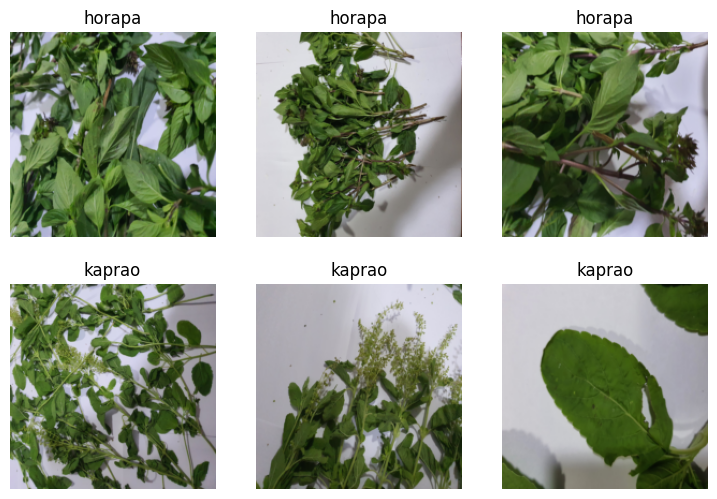

In [23]:
path = Path("gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data")

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")]
).dataloaders(path)

dls.show_batch(max_n=6)

In `fastai`, we can use even more lower-level APIs. `DataBlock` object is one this example. As you can see, it is also required `ImageBlock` and `CategoryBlock` as to input and output modification. We can also identify how we want to split data but in this case, we still do `RandomSplitter` as it is ok to do so with this dataset.

Note that we do not use `from_folder` method anymore. Instead, we use `parent_label` to label from their parent name which in this case, a folder name.

In [24]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 94.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.587313,0.078603,0.021459,05:12


epoch,train_loss,valid_loss,error_rate,time
0,0.085145,0.083044,0.025751,05:50
1,0.052234,0.181116,0.034335,05:24
2,0.038099,0.099724,0.030043,05:45


Off to a bad start. It seems like `valid_loss` and `error_rate` flactuate a lot across each epoch. Well, it might suggest that the bigger model in this case perform worse. But to ensure we also need to check with our test set.

In [29]:
path = Path("gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao")
y_true, y_pred = prediction(path, print_logs=True)

I'm 99.97% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/caa46603-b6ce-44d0-86ab-e7f747595f20.jpeg
****************************************************************************************************


I'm 99.54% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/38e6829b-417c-4cbf-bd44-0b747d70dc35.jpg
****************************************************************************************************


I'm 99.99% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/533be2d3-d7ac-49fc-910a-b1368d6abdf6.jpg
****************************************************************************************************


I'm 87.44% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/185dc0ab-7fcb-4129-a0b6-b048b42274fb.jpg
****************************************************************************************************


I'm 99.99% sure this is horapa. Actually it is horapa!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/horapa/9a4ff1c0-fde4-4967-b60d-b7310c63051a.jpg
****************************************************************************************************


I'm 100.00% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/60584e49-0197-4fa1-96c5-8965be369762.jpg
****************************************************************************************************


I'm 100.00% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/bdfcec70-a5f7-4a75-8e1d-16309d20e837.jpg
****************************************************************************************************


I'm 100.00% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/c2614921-f431-49be-896b-da0132add88b.jpg
****************************************************************************************************


I'm 99.98% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/b9b4d37d-7550-4d34-bdb8-eecb469d97cd.jpg
****************************************************************************************************


I'm 99.64% sure this is kaprao. Actually it is kaprao!
Filename: gdrive/My Drive/practical-deep-learning/horapa-vs-kaprao/data/horapa_or_kaprao/kaprao/4e6e309f-b298-43a7-bf71-f714b0bcd8cd.jpg
****************************************************************************************************


In [30]:
# F1-score for positive class
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.88      0.85      0.87        27

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



`resnet50` gives us 87% of F1-score and as you can see, it worse than `resnet34` as it is likely to suffer from overfitting due to its bigger architecture.

In [ ]:
# Save it for later use
learn.export("../model/horapa-vs-kaprao-resnet50.pkl")